In [27]:
import yaml
import h5py
import numpy as np
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import nibabel as nib
import pandas as pd
from IPython.display import clear_output

In [28]:
sys.path.insert(1, "/Users/dvarelat/Documents/MASTER/TFM/methods")
import util_daniela as u

In [29]:
mask = "/Users/dvarelat/Documents/MASTER/TFM/methods/mycellpose/20190401_E2_DAPI_decon_0.5_MASK_02.nii.gz"
decon = "/Users/dvarelat/Documents/MASTER/TFM/DATA/20190401_E2_down/20190401_E2_DAPI_decon_0.5.nii.gz"
prob = "/Users/dvarelat/Documents/MASTER/TFM/methods/plantseg/lightsheet_unet_bce_dice_nuclei_ds1x/20190401_E2_DAPI_decon_0.5_zyx_predictions.h5"

In [30]:
ORIGINAL = "/Users/dvarelat/Documents/MASTER/TFM/DATA/20190401_E2/20190401_E2_DAPI.nii.gz"
ORIGINAL = "/Users/dvarelat/Documents/MASTER/TFM/DATA/20190401_E2/20190401_E2_DAPI_decon.nii.gz"

In [26]:
proxy = nib.load(ORIGINAL)

In [27]:
for i in [1,2,3]:
    print(np.round(proxy.header["pixdim"][i], 6))
    print(proxy.header["dim"][i])

0.426835
2048
0.426835
2048
0.498455
1132


In [33]:
img_zxy = u.read_nii_XYZ(ORIGINAL, get_ZXY=True)
img_zxy.shape

Rotating axes: zyx


(1132, 2048, 2048)

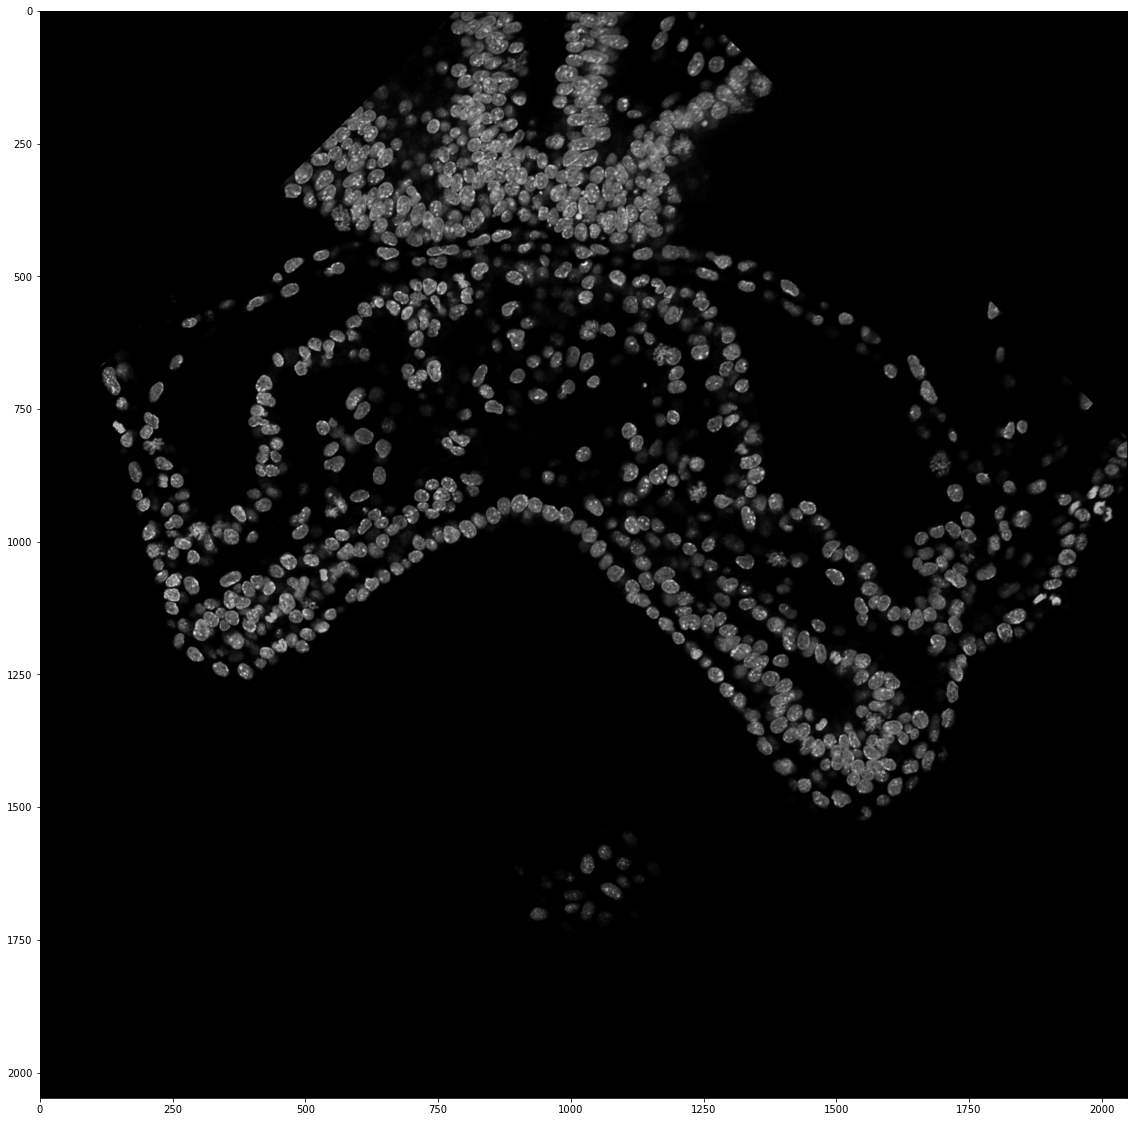

In [42]:
plt.figure(figsize=(20,20)) 
plt.imshow(img_zxy[300, :, :], cmap='gray')

In [5]:
orig_zyx = u.read_nii(orig, cellpose=True)
orig_zyx.shape

Rotating axes: zyx


(566, 1024, 1024, 1)

In [6]:
full_prob = np.array(h5py.File(prob, 'r')["predictions"])
full_prob.shape

(2, 566, 1024, 1024)

In [7]:
labels = (full_prob > 0.4).astype("uint16")

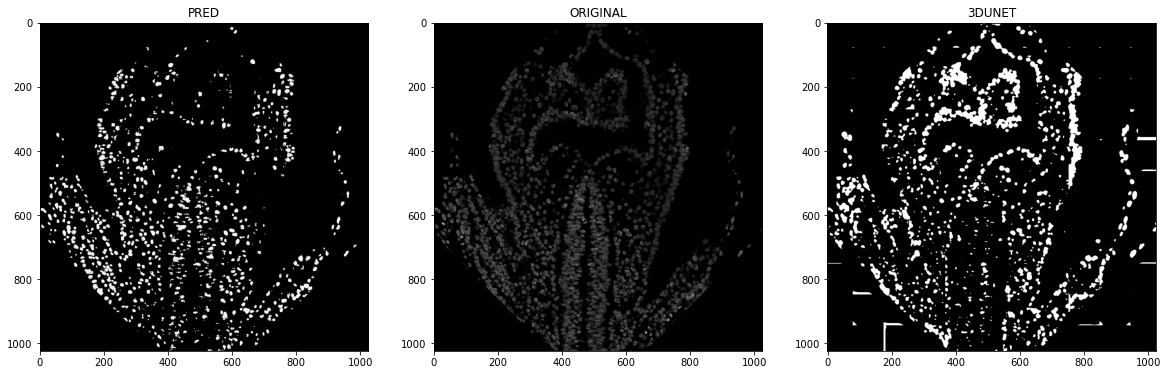

In [9]:
n = 300
plt.figure(figsize=(20,20)) 
plots = [img_zyx[n, :, :], orig_zyx[n, :, :], labels[0,n,:,:]]
titles =["PRED", "ORIGINAL", "3DUNET"]
for i in range(len(plots)):
    plt.subplot(1,len(plots),i+1).set_title(titles[i]) 
    plt.imshow(plots[i], cmap='gray')
plt.show()

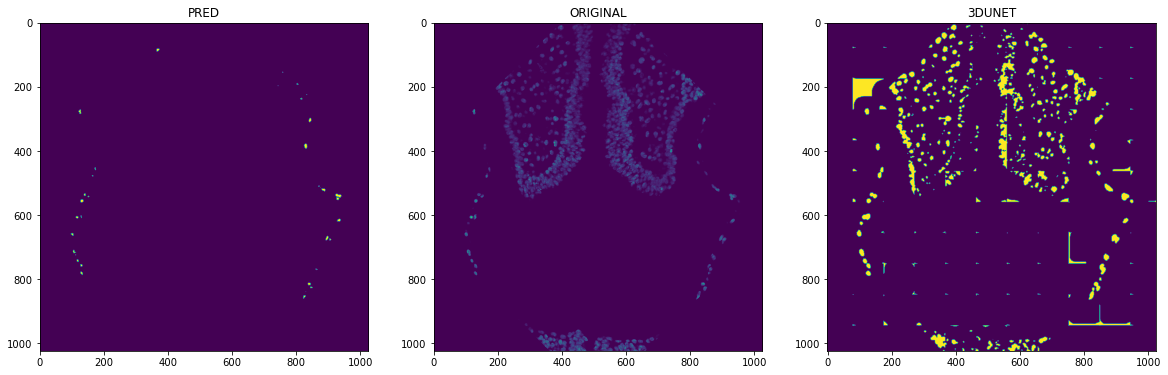

In [12]:

for t in range(50):
    plt.figure(figsize=(20,20)) 
    n = 10*t
    #print(n)
    plots = [img_zyx[n, :, :], orig_zyx[n, :, :], labels[0,n,:,:]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1).set_title(titles[i]) 
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

In [ ]:
from IPython.display import clear_output

for t in range(30):
    plt.figure(figsize=(20,20)) 
    n = 10*t
    #print(n)
    plots = [img_zyx[n, :, :], orig_zyx[n, :, :]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1).set_title(titles[i]) 
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)


# CHECK PREDICTION 

In [17]:
cellpose = "/Users/dvarelat/Documents/MASTER/TFM/methods/mycellpose/0401_E2_RGB_MASK.nii.gz"

In [21]:
cellpose_zxy = u.read_nii_XYZ(cellpose, get_ZXY=True)
cellpose_zxy.shape

Rotating axes: zyx


(1024, 1024, 566)

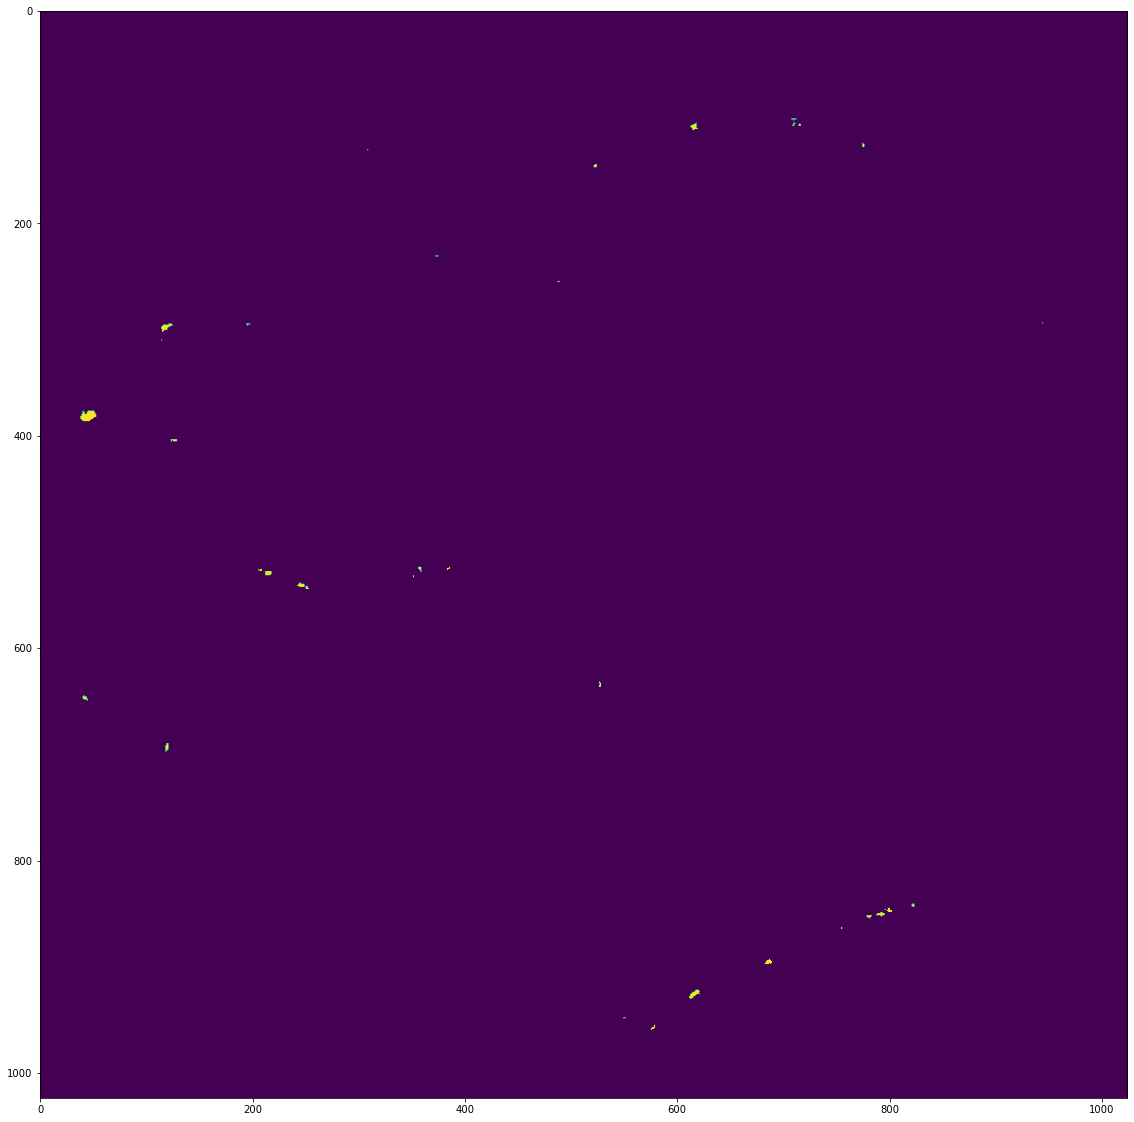

In [26]:
for t in range(50):
    plt.figure(figsize=(20,20)) 
    n = 10*t
    #print(n)
    plots = [cellpose_zxy[:, :, n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)